In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
dataset = pd.read_excel('/Users/rishavdas/Downloads/Data/HR_Employee_Attrition-1.xlsx')

dataset.head()

In [2]:
dataset.shape

(2940, 35)

In [11]:
category_cols = dataset.select_dtypes('object')

In [12]:
category_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [13]:
for i in category_cols:
    print(f"Unique Values in {i} are :")
    print(category_cols[i].value_counts())
    print("*"*50)

Unique Values in Attrition are :
No     2466
Yes     474
Name: Attrition, dtype: int64
**************************************************
Unique Values in BusinessTravel are :
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
**************************************************
Unique Values in Department are :
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
**************************************************
Unique Values in EducationField are :
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
**************************************************
Unique Values in Gender are :
Male      1764
Female    1176
Name: Gender, dtype: int64
**************************************************
Unique Values in JobRole are :
Sales Ex

In [14]:
dataset.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
dataset.drop(columns='Over18', inplace=True)

In [16]:
dataset.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
dataset.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [19]:
categorical_dataset = dataset.describe(include=['object']).T

In [22]:
categorical_dataset['pct'] = (categorical_dataset['freq']/categorical_dataset['count'])*100

In [23]:
categorical_dataset

,count,unique,top,freq,pct
Attrition,2940,2,No,2466,83.877551
BusinessTravel,2940,3,Travel_Rarely,2086,70.952381
Department,2940,3,Research & Development,1922,65.37415
EducationField,2940,6,Life Sciences,1212,41.22449
Gender,2940,2,Male,1764,60.0
JobRole,2940,9,Sales Executive,652,22.176871
MaritalStatus,2940,3,Married,1346,45.782313
OverTime,2940,2,No,2108,71.70068


In [24]:
dataset.groupby(['Attrition'])['BusinessTravel'].count()

Attrition
No     2466
Yes     474
Name: BusinessTravel, dtype: int64

In [25]:
dataset.groupby(['BusinessTravel'])['Attrition'].count()

BusinessTravel
Non-Travel            300
Travel_Frequently     554
Travel_Rarely        2086
Name: Attrition, dtype: int64

**what are the different factors between those who are leaving vs those who are not leaving ?**

In [27]:
dataset.groupby(['Attrition', 'BusinessTravel'])['MonthlyIncome'].mean()

Attrition  BusinessTravel   
No         Non-Travel           6350.746377
           Travel_Frequently    6828.091346
           Travel_Rarely        6908.818489
Yes        Non-Travel           5240.750000
           Travel_Frequently    4281.434783
           Travel_Rarely        4975.852564
Name: MonthlyIncome, dtype: float64

## Observation:
- Salary for those leaving the organization is lower comapratively to those who are not leaving 
- salary is lower for those who are travelling very frequently and leaving the organization 


In [28]:
dataset.groupby(['Attrition', 'PerformanceRating'])['PercentSalaryHike'].mean()

Attrition  PerformanceRating
No         3                    14.040230
           4                    21.809524
Yes        3                    13.810000
           4                    22.054054
Name: PercentSalaryHike, dtype: float64

## Observation:
- No difference observed between Attirated and non attirated employees

In [30]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


## Univariate Analysis

**Continous univariate Analysis**

In [41]:
def Continous_univariate_Analysis(data,
                                  feature,
                                  figsize=(12, 7),
                                  kde=False,
                                  bins=None):
    f1, (ax_box,
         ax_hist) = plt.subplots(nrows=2,
                                 sharex=True,
                                 gridspec_kw={"height_ratios": (0.25, 0.75)},
                                 figsize=figsize)
    sns.color_palette('crest', as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='violet')
    sns.histplot(
        data=data, x=feature, ax=ax_hist, kde=kde, bins=bins,
        color='crest') if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist)

    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='red', linestyle='-')

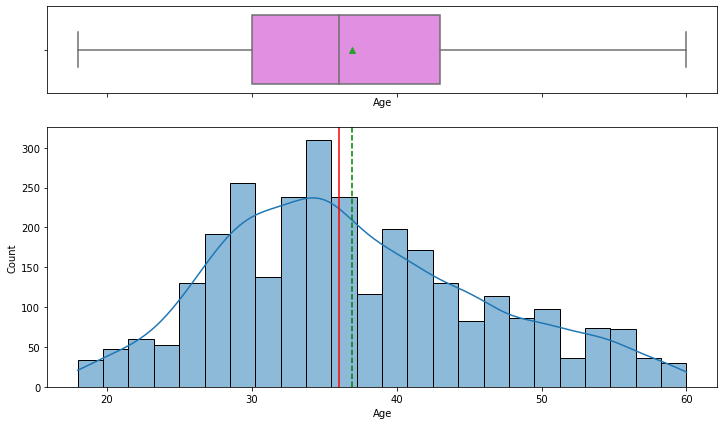

In [44]:
Continous_univariate_Analysis(dataset, 'Age', kde=True)

## Observation
- Age is normally distributed 
- no outlier observed 
- mean is near to median 


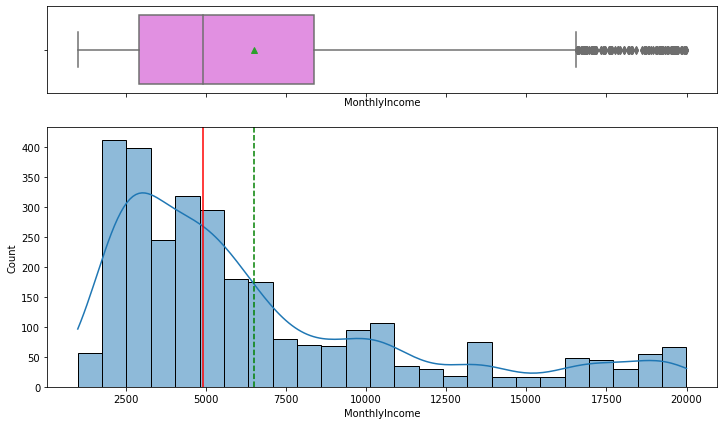

In [45]:
Continous_univariate_Analysis(dataset, 'MonthlyIncome', kde=True)

## Observation
- distribution is left skewed 
- Above 16000, all the salaries are treated as outliers
- As it is left skewed, it has good differnce between mean and median 
- Majority of the employees are earning between 3000 to 8000 dollars per month 
- 8% employees are earning above 16K dollars
- Only Manager and  Research Director earning more than 16K dollars 

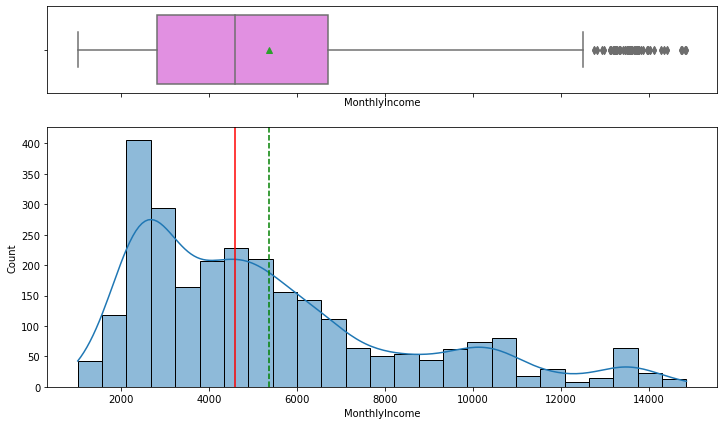

In [46]:
Continous_univariate_Analysis(dataset[dataset['MonthlyIncome']<=15000], 'MonthlyIncome', kde=True)

In [52]:
dataset[dataset['MonthlyIncome']>=16000]['JobRole'].unique()

array(['Manager', 'Research Director'], dtype=object)

In [50]:
252/2940

0.08571428571428572